In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


In [10]:
# Display plots inline in Jupyter
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [ ]:
 #=============================================
# 1. DATA PREPARATION
# =============================================

# Create synthetic dataset with balanced representation
# Note: In practice, you would load real clinical data
drug_data = {
    # Patient ages
    'Age': [23,47,47,28,61,22,49,41,60,43,29,33,45,58,19,25,52,37,31,55],
    
    # Biological sex (F = female, M = male)
    'Sex': ['F','M','M','F','F','F','M','M','F','M','F','M','F','M','F','M','F','M','F','M'],
    
    # Blood pressure levels
    'BP': ['HIGH','LOW','LOW','NORMAL','LOW','NORMAL','NORMAL','HIGH','HIGH','LOW',
           'NORMAL','HIGH','LOW','NORMAL','HIGH','LOW','NORMAL','HIGH','NORMAL','LOW'],
    
    # Cholesterol levels
    'Cholesterol': ['HIGH','HIGH','HIGH','HIGH','HIGH','HIGH','NORMAL','NORMAL',
                   'NORMAL','NORMAL','HIGH','NORMAL','HIGH','NORMAL','HIGH','NORMAL',
                   'HIGH','NORMAL','NORMAL','HIGH'],
    
    # Sodium-to-Potassium ratio (important clinical marker)
    'Na_to_K': [25.36,13.09,10.11,7.80,18.04,8.61,9.21,19.67,15.23,11.34,
               12.8,14.2,9.5,16.7,22.1,11.9,13.5,17.8,15.0,20.1],
    
    # Drug prescriptions (our target variable)
    'Drug': ['drugY','drugC','drugC','drugX','drugY','drugX','drugX','drugY','drugY',
            'drugX','drugA','drugB','drugC','drugY','drugY','drugX','drugB','drugY',
            'drugA','drugB']
}

# Convert to pandas DataFrame
df = pd.DataFrame(drug_data)

# Display dataset info
print("=== DATASET OVERVIEW ===")
print(f"Total samples: {len(df)}")
print(f"Features available: {list(df.columns)}")
print("\nFirst 5 records:")
display(df.head())

In [ ]:
# =============================================
# 2. DATA PREPROCESSING
# =============================================

# Initialize LabelEncoder for categorical features
le = LabelEncoder()

# Convert categorical features to numerical values
print("\n=== ENCODING CATEGORICAL FEATURES ===")
df['Sex_encoded'] = le.fit_transform(df['Sex'])  # F→0, M→1
df['BP_encoded'] = le.fit_transform(df['BP'])    # HIGH→0, LOW→1, NORMAL→2
df['Chol_encoded'] = le.fit_transform(df['Cholesterol'])  # HIGH→0, NORMAL→1

# Create numerical mapping for drug classes
drug_mapping = {
    'drugA': 0,
    'drugB': 1,
    'drugC': 2,
    'drugX': 3,
    'drugY': 4
}
df['Drug_encoded'] = df['Drug'].map(drug_mapping)

# Verify encoding
print("\nEncoded values sample:")
print(df[['Sex', 'Sex_encoded', 'BP', 'BP_encoded', 
          'Cholesterol', 'Chol_encoded', 'Drug', 'Drug_encoded']].head())

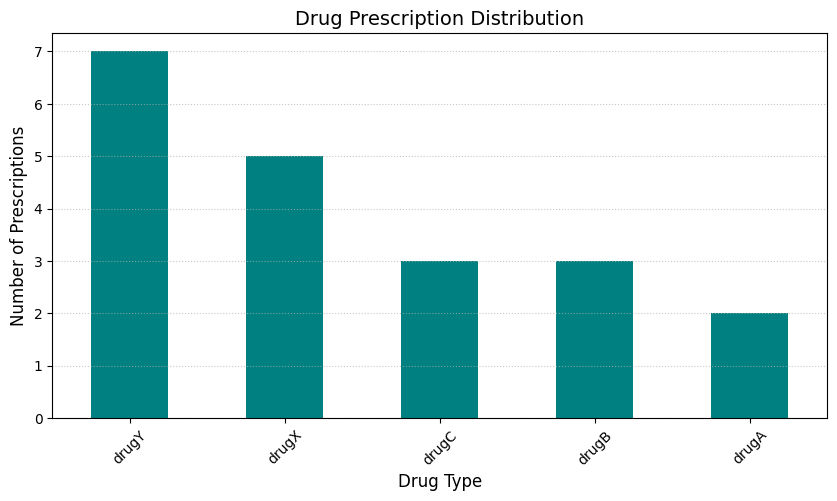

In [11]:

# =============================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================

# Plot drug distribution
plt.figure(figsize=(10,5))
df['Drug'].value_counts().plot(kind='bar', color='teal')
plt.title('Drug Prescription Distribution', fontsize=14)
plt.xlabel('Drug Type', fontsize=12)
plt.ylabel('Number of Prescriptions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.show()


In [12]:
# =============================================
# 4. MODEL TRAINING (FIXED VERSION)
# =============================================

# Prepare features (X) and target (y)
X = df[['Age', 'Sex_encoded', 'BP_encoded', 'Chol_encoded', 'Na_to_K']]
y = df['Drug']

# Calculate minimum test size needed (at least 1 sample per class)
min_test_size = len(drug_mapping) / len(df)  # 5 classes / 20 samples = 0.25

# Use 30% test size (6 samples) which is > number of classes (5)
test_size = 0.3 if (0.3 * len(df)) > len(drug_mapping) else min_test_size + 0.05

# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=test_size,
    random_state=42,
    stratify=y
)

print("\n=== DATA SPLITS ===")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(df):.0%})")
print(f"Testing samples: {len(X_test)} ({len(X_test)/len(df):.0%})")
print(f"Classes in test set: {len(np.unique(y_test))}")

# Verify class distribution
print("\nClass distribution in test set:")
print(y_test.value_counts())

# Continue with model training...
dtree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4,
    class_weight='balanced'
)
dtree.fit(X_train, y_train)


=== DATA SPLITS ===
Training samples: 14 (70%)
Testing samples: 6 (30%)
Classes in test set: 5

Class distribution in test set:
Drug
drugY    2
drugC    1
drugA    1
drugB    1
drugX    1
Name: count, dtype: int64


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4)


=== MODEL PERFORMANCE ===
Accuracy: 16.7%

Confusion Matrix (rows = actual, columns = predicted):


,drugA,drugB,drugC,drugX,drugY
drugA,0,0,0,1,0
drugB,1,0,0,0,0
drugC,0,0,0,1,0
drugX,0,0,0,1,0
drugY,2,0,0,0,0



Detailed Classification Report:
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         1
       drugB       0.00      0.00      0.00         1
       drugC       0.00      0.00      0.00         1
       drugX       0.33      1.00      0.50         1
       drugY       0.00      0.00      0.00         2

    accuracy                           0.17         6
   macro avg       0.07      0.20      0.10         6
weighted avg       0.06      0.17      0.08         6



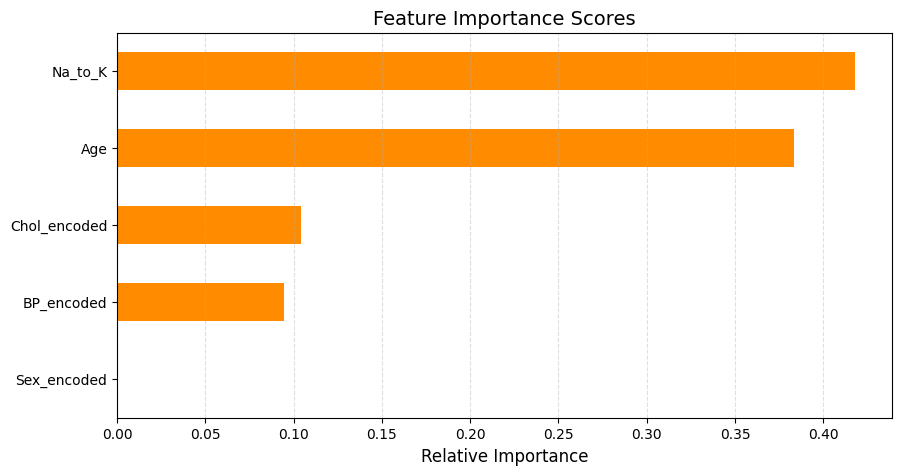

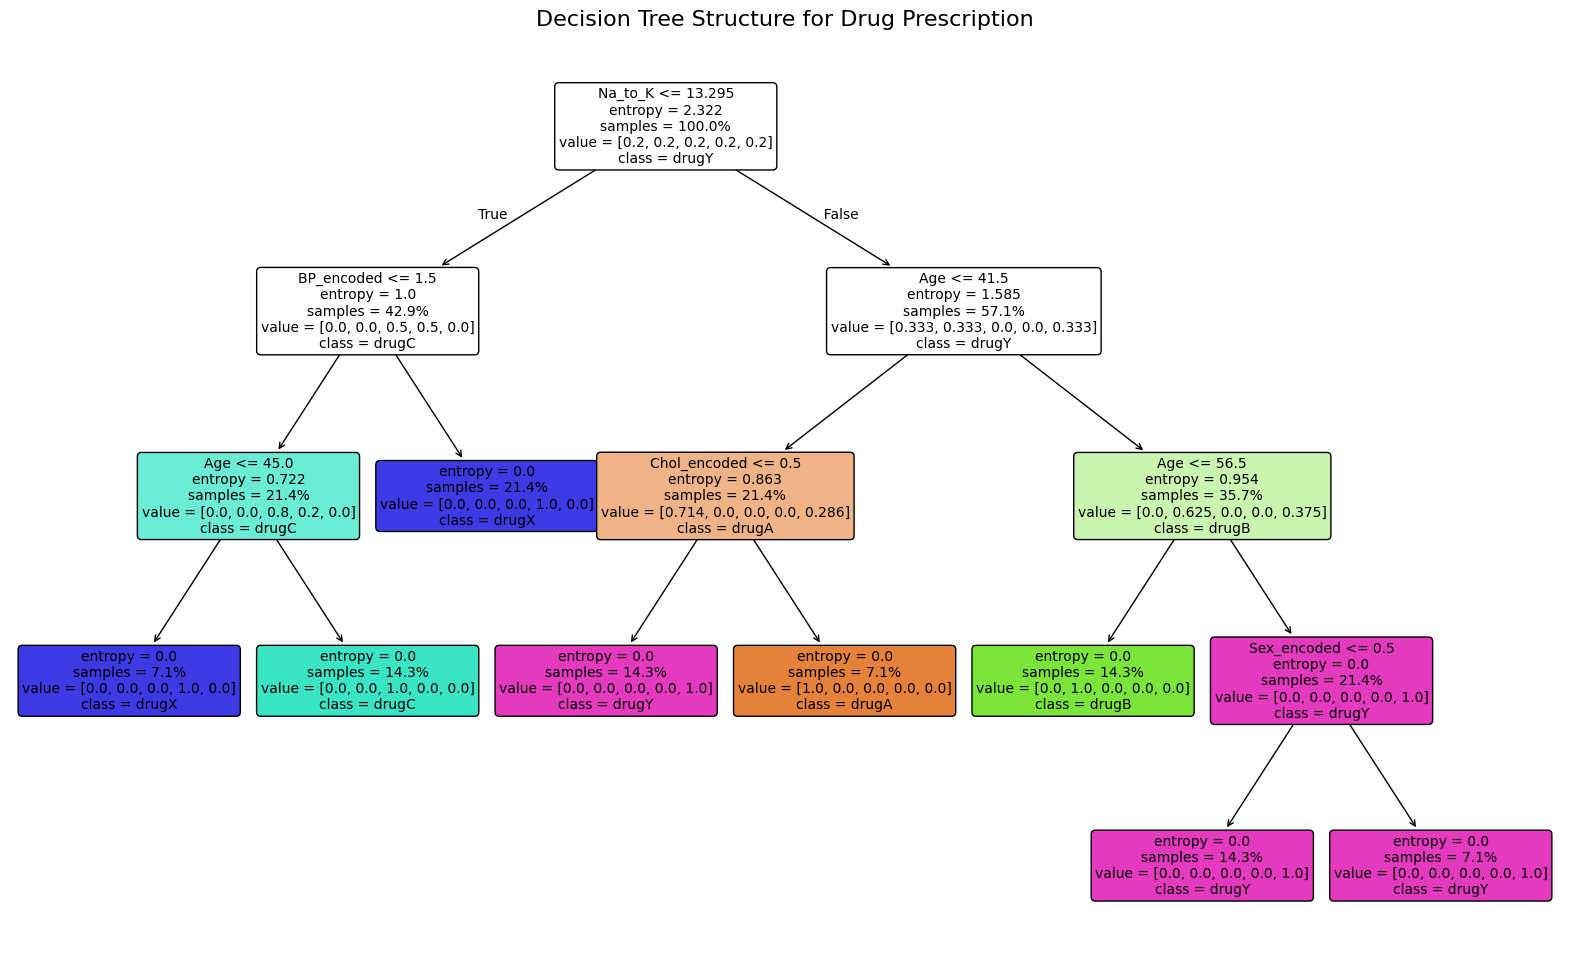

In [13]:
# =============================================
# 5. MODEL EVALUATION
# =============================================

# Make predictions on test set
y_pred = dtree.predict(X_test)

# Calculate and display accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\n=== MODEL PERFORMANCE ===")
print(f"Accuracy: {accuracy:.1%}")

# Generate and display confusion matrix
all_classes = list(drug_mapping.keys())
cm = confusion_matrix(y_test, y_pred, labels=all_classes)

print("\nConfusion Matrix (rows = actual, columns = predicted):")
cm_df = pd.DataFrame(cm, index=all_classes, columns=all_classes)
display(cm_df)

# Generate classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=all_classes))

# =============================================
# 6. MODEL VISUALIZATION
# =============================================

# Plot feature importance
plt.figure(figsize=(10,5))
feature_imp = pd.Series(dtree.feature_importances_, index=X.columns)
feature_imp.sort_values().plot(kind='barh', color='darkorange')
plt.title('Feature Importance Scores', fontsize=14)
plt.xlabel('Relative Importance', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

# Visualize the decision tree
plt.figure(figsize=(20,12))
plot_tree(
    dtree,
    filled=True,                # Color nodes by class
    feature_names=X.columns,    # Feature names
    class_names=all_classes,    # Drug class names  
    rounded=True,               # Rounded node corners
    proportion=True,  # Show proportions in nodes
    fontsize=10                # Adjust font size
)
plt.title("Decision Tree Structure for Drug Prescription", fontsize=16)
plt.show()
           

In [15]:
# =============================================
# 7. MAKING NEW PREDICTIONS (DEMO)
# =============================================

# Example: Predict drug for a new patient
new_patient = [[45, 1, 2, 1, 16.8]]  # [Age, Sex (M=1), BP (NORMAL=2), Chol (NORMAL=1), Na_to_K]

predicted_drug = dtree.predict(new_patient)
probabilities = dtree.predict_proba(new_patient)

print("\n=== NEW PATIENT PREDICTION ===")
print(f"Predicted drug: {predicted_drug[0]}")
print("Prediction probabilities:")
for drug, prob in zip(all_classes, probabilities[0]):
    print(f"{drug}: {prob:.1%}")


=== NEW PATIENT PREDICTION ===
Predicted drug: drugB
Prediction probabilities:
drugA: 0.0%
drugB: 100.0%
drugC: 0.0%
drugX: 0.0%
drugY: 0.0%
